# Live Tutorial - Basic Image manipulation in a Python interactive notebook.

## Presented by Hossein Jashnsaz, Vanderbilt University
IGP Quantitative Biology  
2023-03-07  

```
Modified from original file found here:
https://colab.research.google.com/drive/1o3JJE4EjfW9P5ZITEeS5p8Ui60xV3etK?usp=sharing

Copyright (c) 2021 Dr. Brian Munsky. 
Dr. Luis Aguilera, Will Raymond
Colorado State University.
Licensed under MIT License.
```


# Abstract 

This notebook provides a list of procedures to analyze microscope images. The notebook describes what a digital image is. How to extract relevant information from the image. At the end of the tutorial, the student is expected to acquire the computational skills to implement the following list of objectives independently.

## List of objectives


1. To load the python modules commonly used to work with microscope data.
2. To understand what is a digital image in terms of matrices and tensors.
3. To understand what is a monochromatic image and a color image.
4. To select and slice the dimensions in a sequence of microscope images.
5. To apply differents filters to remove noise from an image using linear algebra operations.
6. To perform basic mathematic operations, including rotation, translation, and scaling. 



# Working with images in python

The following lines of code import and install some libraries. For more information, look at the library name on the  Python Package Index [(PyPI)](https://pypi.org/).

In [1]:
# Loading libraries
import matplotlib.pyplot as plt # Library used for plotting
from matplotlib.patches import Rectangle # module to plot a rectangle in the image
import urllib.request # importing library to download data
import numpy as np # library for array manipulation
import seaborn as sn # plotring library
import pandas as pd # data frames library
import tifffile # library to store numpy arrays in TIFF
import pathlib; from pathlib import Path # library to work with file paths
import os

In [2]:
# Installing and updating libraries
import skimage # Library for image manipulation
from skimage.io import imread # sublibrary from skimage

<img src= https://github.com/MunskyGroup/uqbio2021/raw/main/module_0/presentation/images/Slide3.png alt="drawing" width="1200"/>

## Downloading, opening and visualizing images 



In [3]:
# Downloading the image from figshare SupFig1c_BG_MAX_Cell04.tif
# urls = ['https://ndownloader.figshare.com/files/26751209','https://ndownloader.figshare.com/files/26751203','https://ndownloader.figshare.com/files/26751212','https://ndownloader.figshare.com/files/26751218']

In [4]:
# importing the image as variable img
if not os.path.exists('./image_cell.tif'):
    !wget -O image_cell.tif https://ndownloader.figshare.com/files/26751209
img = imread('./image_cell.tif') 

## Understanding digital images.

What is a digital image?

In [5]:
# what is img?
print('image type =', type(img))

image type = <class 'numpy.ndarray'>



What is the shape of the image?



In [6]:
print('image shape =',img.shape )

image shape = (35, 512, 512, 3)


Displaying a section of the image. Notice that an image is only a matrix of numbers.

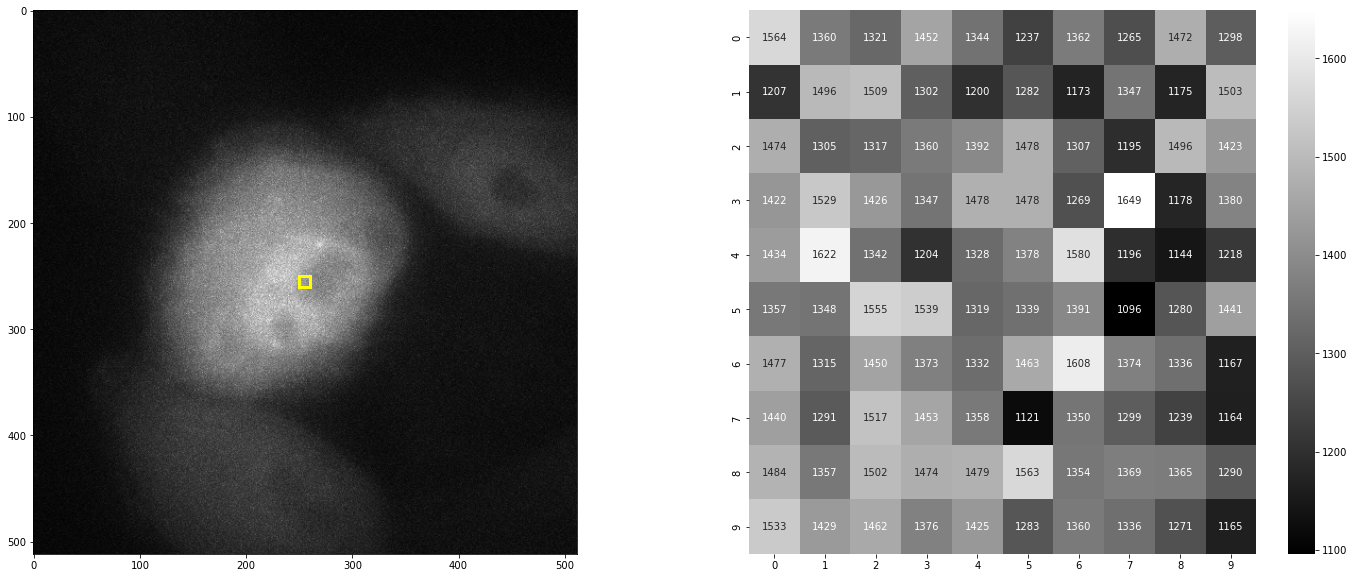

In [7]:
df = pd.DataFrame(img[0 , 250:260,250:260,0] ) # converting the image into a pandas data frame
# Plotting
fig, ax = plt.subplots(1,2, figsize=(25, 10))
ax[0].imshow(img[0,:,:,0],cmap='gray') 
ax[0].add_patch(Rectangle(xy=(250, 250),width=10,height=10,linewidth=3,color='yellow',fill=False)) # rectangle in the image
# Plotting the heatmap of a section in the image
sn.heatmap(df, annot=True,cmap="gray",fmt='d', ax=ax[1])
plt.show()

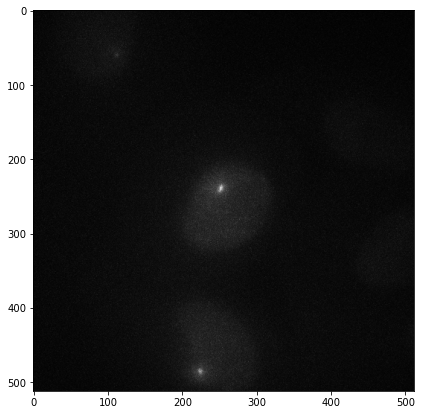

In [8]:
plt.figure(figsize=(7,7))
plt.imshow(img[0,:,:,2],cmap='gray') # Notice that only a timepoint and a color is plotted.
plt.show()

From the [image's publication](https://www.biorxiv.org/content/10.1101/2020.04.03.024414v2) we can obtain the metadata. Indicating that the following information:

Dimension  | Meaning |  Value
---------|---------- |----------
0   | Time        | 35 (frames)
1   | Y-dimension | 512 pixels
2   | X-dimension | 512 pixels
3   | Color       | 3 color image (R,G,B)


<img src= https://github.com/MunskyGroup/uqbio2021/raw/main/module_0/presentation/images/Slide5.png alt="drawing" width="1200"/>

Intensity values in the image

In [9]:
# minimum and maximum intensity values on the image
max_intensity_value = np.amax(img)
min_intensity_value = np.amin(img)

quant_intensity_value = np.quantile(img, 0.9)

print('Maximum intensity : ', max_intensity_value)
print('Minimum intensity : ', min_intensity_value)
print('Quantile intensity: ', quant_intensity_value )


Maximum intensity :  6380
Minimum intensity :  0
Quantile intensity:  828.0


Intensity distribution in the image

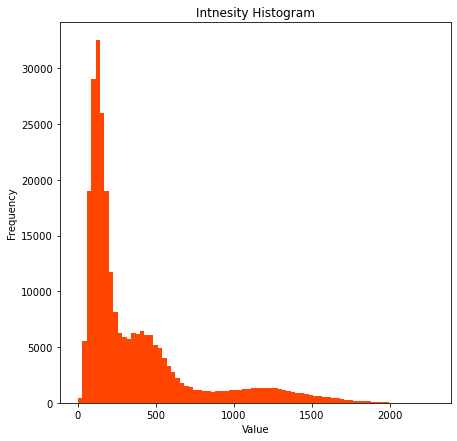

In [10]:
# plotting the intensity distribution for a specific timepoint and an specific channel
plt.figure(figsize=(7,7))
plt.hist(img[0,:,:,0].flatten(), bins=80,color='orangered')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Intnesity Histogram')
plt.show()

Summary of image properties: 

* 4 dimensional tensor [T,Y,X,C]. 
* Numpy array
* Intensity range (0, 6380)





### Grayscale images

In [11]:
# please try to run the following line of code and find why it doesn't work?
#plt.imshow(img) 

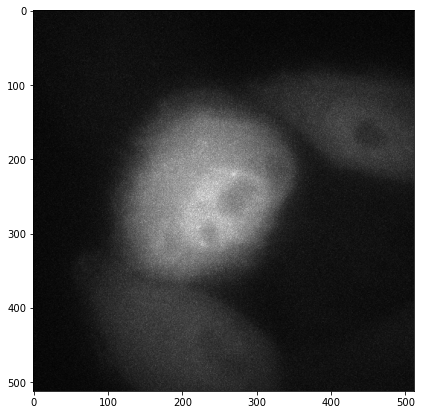

In [12]:
# Visualzing a monochromatic image
plt.figure(figsize=(7,7))
plt.imshow(img[0,:,:,0],cmap='gray') # Notice that only a timepoint and a color is plotted.

plt.show()

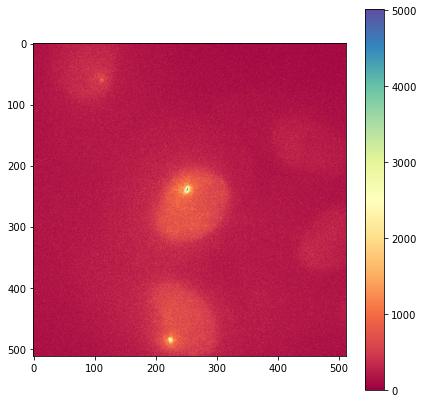

In [13]:
# Visualzing a monochromatic image with a different colormap
plt.figure(figsize=(7,7))
plt.imshow(img[0,:,:,2],cmap= 'Spectral')  # colormap options are: 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean',
plt.colorbar()
plt.show()

### Bit depth, intensity in images.

Bit depth is the information stored on each pixel in the image. 

Bits  | Color values: $2^n$
---------|------------------
1 bit    | 2 
8 bit    | 256 
12 bit   | 4096
16 bit   | 65536



In [14]:
# https://stackoverflow.com/questions/46689428/convert-np-array-of-type-float64-to-type-uint8-scaling-values/46689933
def convert(img, target_type_min, target_type_max, target_type):
    '''
    This function is inteded to normalize img and change the image to the specified target_type
      img: numpy array
      target_type_min: int
      target_type_max: int
      target_type: str, optins are: np.uint
    '''
    imin = img.min()
    imax = img.max()
    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

Check this [link](https://numpy.org/doc/stable/user/basics.types.html) for a complete list of numpy data types.

In [15]:
# Normalizing and converting images between different bit-depts.
#Convert an image to unsigned byte format, with values in [0, 1].
img_int1 = convert(img, 0,1,target_type=np.bool_)
#Convert an image to unsigned byte format, with values in [0, 8].
img_int3 = convert(img, 0,8,target_type=np.uint8)
#Convert an image to unsigned byte format, with values in [0, 255].
img_int8 = convert(img, 0,255,target_type=np.uint8)

In [16]:
print('Range in 1-bit image: [', np.amin(img_int1),',' ,np.amax(img_int1) , ']' )
print('Range in 3-bit image: [', np.amin(img_int3),',' ,np.amax(img_int3) , ']' )
print('Range in 8-bit image: [', np.amin(img_int8),',' ,np.amax(img_int8) , ']' )
print('Range in 16-bit image: [', np.amin(img),',' ,np.amax(img) , ']' )

Range in 1-bit image: [ False , True ]
Range in 3-bit image: [ 0 , 8 ]
Range in 8-bit image: [ 0 , 255 ]
Range in 16-bit image: [ 0 , 6380 ]


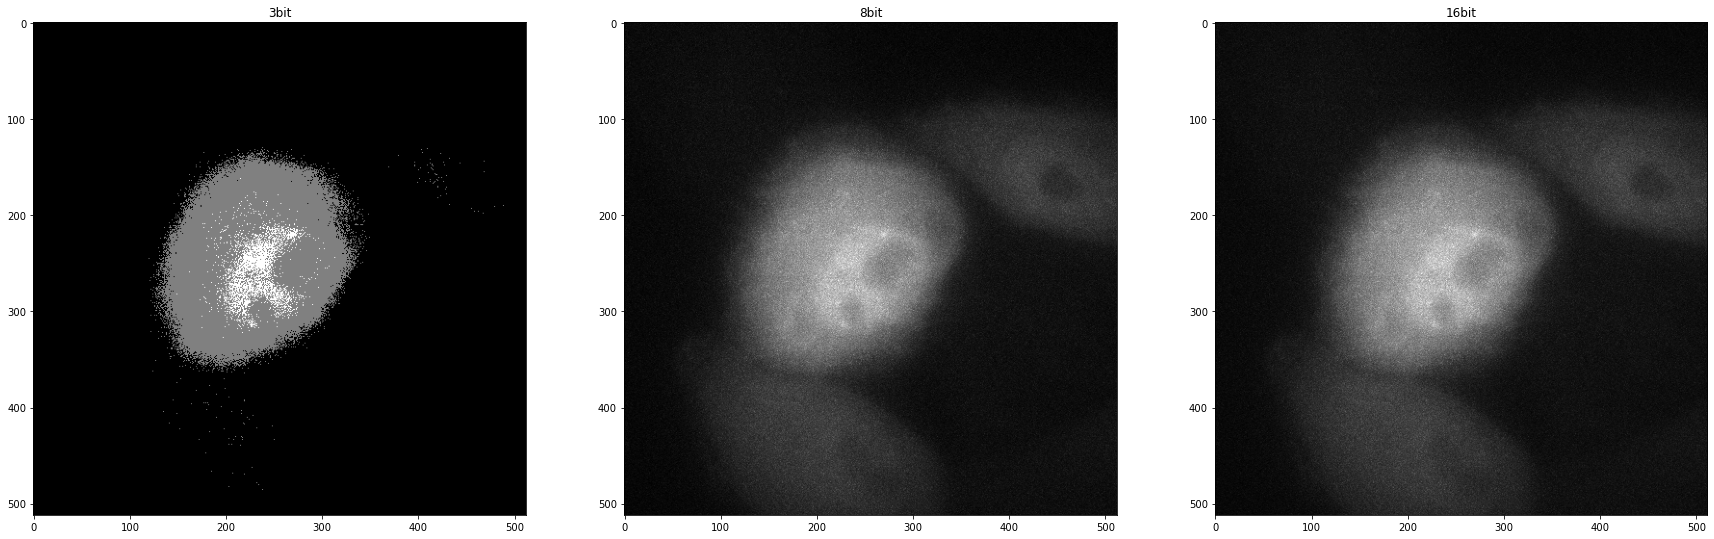

In [17]:
# Side-by-side comparison
fig, ax = plt.subplots(1,3, figsize=(30, 20))
ax[0].imshow(img_int3[0,:,:,0],cmap='gray')
ax[0].set(title='3bit')
ax[1].imshow(img_int8[0,:,:,0],cmap='gray')
ax[1].set(title='8bit')
ax[2].imshow(img[0,:,:,0],cmap='gray')
ax[2].set(title='16bit')
plt.show()

#### Values in the image

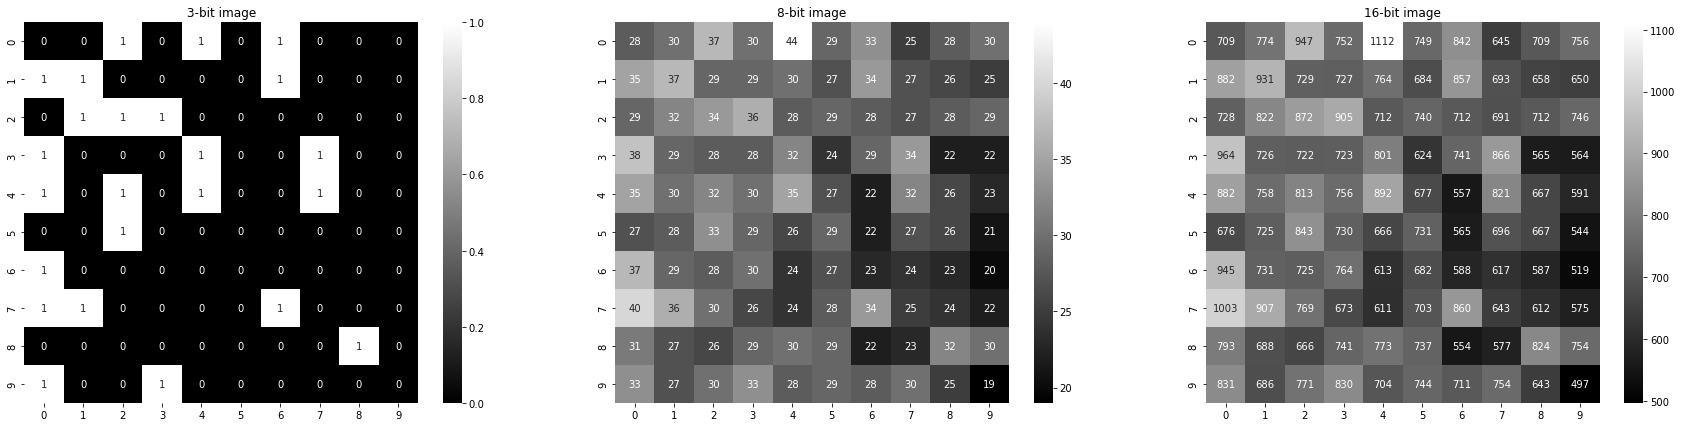

In [18]:
# Selecting a section of the images and converting this section into a data frame
min_selection_area = 300
max_selection_area = min_selection_area+10
df_3bit = pd.DataFrame(img_int3[0,min_selection_area:max_selection_area,min_selection_area:max_selection_area,0] ) # Range in 3-bit image: [ 0 , 8 ]
df_8bit = pd.DataFrame(img_int8[0,min_selection_area:max_selection_area,min_selection_area:max_selection_area,0] ) # Range in 8-bit image: [ 0 , 255 ]
df_16bit = pd.DataFrame(img[0,min_selection_area:max_selection_area,min_selection_area:max_selection_area,0] ) # Range in 16-bit image: [ 0 , 65536 ]. In this particular image the original maximum value is 6380

# Plotting
fig, ax = plt.subplots(1,3, figsize=(30, 7))
# Plotting the heatmap of a section in the image
sn.heatmap(df_3bit, annot=True,cmap="gray",fmt='d', ax=ax[0])
ax[0].set_title('3-bit image')
sn.heatmap(df_8bit, annot=True,cmap="gray",fmt='d', ax=ax[1])
ax[1].set_title('8-bit image')
sn.heatmap(df_16bit, annot=True,cmap="gray",fmt='d', ax=ax[2])
ax[2].set_title('16-bit image')
plt.show()

#### File size for different data types and bit depth

In [19]:
#saving the images to disk
tifffile.imwrite('temp_img_int8.tif', img_int8)
tifffile.imwrite('temp_img_int16.tif', img)

# Loading the images 
print("File size of the 8-bit image in Mb is: ", round(Path('temp_img_int8.tif').stat().st_size/1e6))
print("File size of the 16-bit image in Mb is: ", round(Path('temp_img_int16.tif').stat().st_size/1e6))

File size of the 8-bit image in Mb is:  28
File size of the 16-bit image in Mb is:  55


### Color images. Color channel [R,G,B].

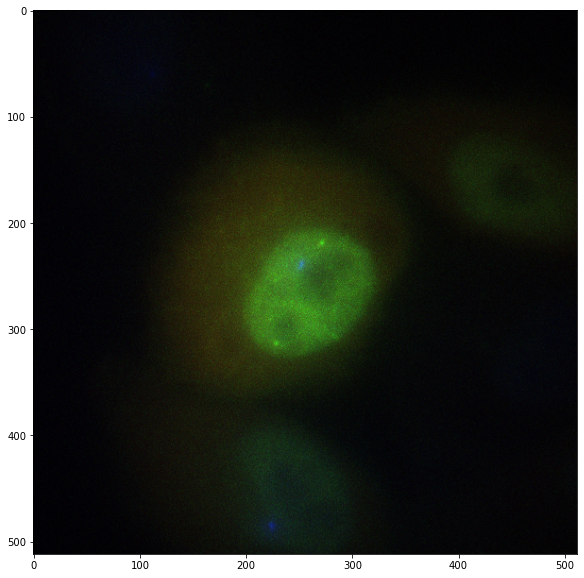

In [20]:
# Visualzing a color image
plt.figure(figsize=(10,10))
plt.imshow(img_int8[0,:,:,:]) # Notice that only a timepoint and all colors are plotted.
plt.show()

### Working with images in Python

### Basic image manipulation

#### Slicing

In this section we select parts of the image.

The image is a numpy array with dimensions:
```
image [time, y-axis, x-axis, colors]
```

If we need to select the following elements:
* timepoint(frame) 5
* y-axis from 100 to 200 pixel
* x-axis from 230 to 300 pixel
* "Green" color (Color 1 in the standard format [R,G,B]),

The way to slice the numpy array is as follows:

```
image[5, 100:200, 230:300, 1]
```




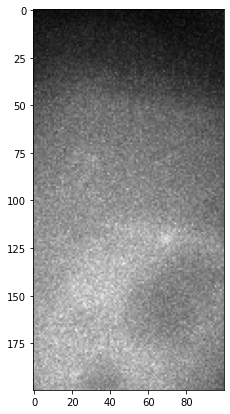

In [21]:
# Ploting a subsection of the image.
# Time point: 0
# Y-range: [100:300]
# X-range: [200:300]
# Channel: Red (0)
plt.figure(figsize=(7,7))
plt.imshow(img_int8[0, 100:300, 200:300 , 0],cmap='gray') # Notice that only a timepoint and a color is plotted.
plt.show()

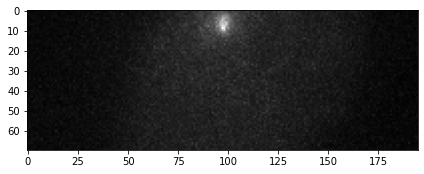

In [22]:
# Ploting a subsection of the image.
# Time point: 22
# Y-range: [230:300]
# X-range: [155:350]
# Channel: Blue (2)
plt.figure(figsize=(7,7))
plt.imshow(img_int8[22,230:300,155:350,2],cmap='gray') # Notice that only a timepoint and a color is plotted.
plt.show()

#### Thresholding

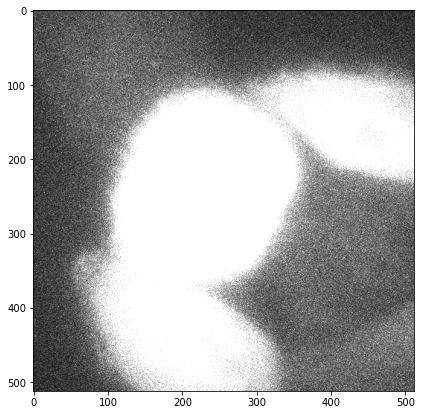

In [23]:
# Making values less than the average equal to zero.

img_copy = img.copy() # making a copy of our img
img_section = img_copy[0,:,:,0] # selecting a timepoint and color channel
#img_section[img_section>1000]=1000  # thresholding image values larger than 1000 equal to 1000.

img_section[img_section > np.mean(img_section) ]=np.mean(img_section)  # thresholding image values larger than the mean equal to the mean.

# Plotting
plt.figure(figsize=(7,7))
plt.imshow(img_section,cmap='gray') # Notice that only a timepoint and a color is plotted.
plt.show()

#### Filters

[Filters](https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html) are used to :

*   Noise reduction
*   Edge detection
*   Sharpening
*   Blurring

The mathematical operation is a 2D convolution. This convolution involves defining a smaller kernel matrix and applying the same mathematical operation to each pixel in the entire image. A more complete explanation can be found in this [video](https://youtu.be/8rrHTtUzyZA?t=72).


<img src= https://github.com/MunskyGroup/uqbio2021/raw/main/module_0/presentation/images/Slide6.png alt="drawing" width="1200"/>

##### Gaussian Filter. Noise reduction and blurring.

$G_\sigma = \frac{1}{2\pi\sigma^2}e{\frac{x^2+y^2}{2\sigma^2}}$

1.0000000000000007
0.9999999999999989
0.9999999999999988


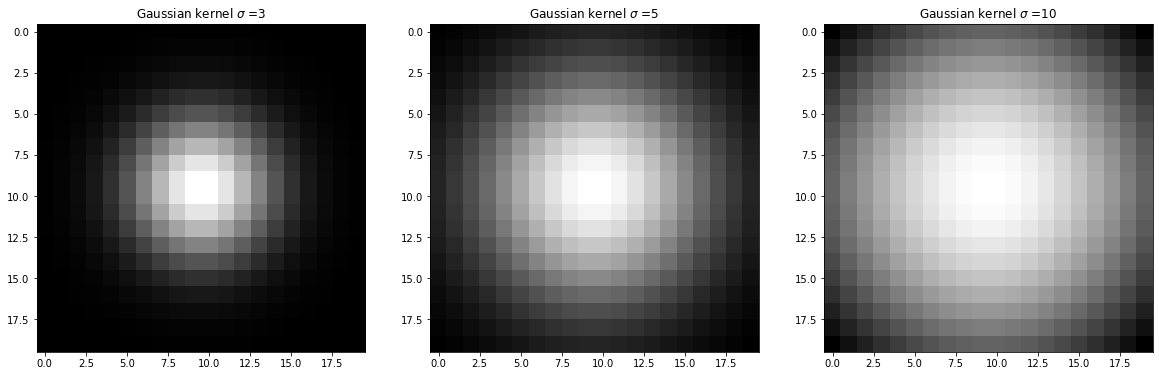

In [24]:
# Section that creates the Gaussian Kernel Matrix
def gaussian_kernel (size_matrix,sigma):
  '''
  This function returns a normalized gaussian kernel matrix
  size_matrix : int
  sigma: float
  '''
  ax = np.linspace(-(size_matrix - 1) / 2., (size_matrix - 1) / 2., size_matrix)
  xx, yy = np.meshgrid(ax, ax)
  kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma)) 
  kernel = kernel/kernel.sum() # normalizing to the sum
  return kernel

# Gaussian Kernel matrix for different sigmas.
kernel_gaussian_sigma_3 = gaussian_kernel (size_matrix=20,sigma=3)
kernel_gaussian_sigma_5 = gaussian_kernel (size_matrix=20,sigma=5)
kernel_gaussian_sigma_10 = gaussian_kernel (size_matrix=20,sigma=10)

print(sum(kernel_gaussian_sigma_3.flatten()))
print(sum(kernel_gaussian_sigma_5.flatten()))
print(sum(kernel_gaussian_sigma_10.flatten()))


# Side-by-side comparizon
fig, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].imshow(kernel_gaussian_sigma_3,cmap='gray')
ax[0].set(title='Gaussian kernel $\sigma$ =3')
ax[1].imshow(kernel_gaussian_sigma_5,cmap='gray')
ax[1].set(title='Gaussian kernel $\sigma$ =5')
ax[2].imshow(kernel_gaussian_sigma_10,cmap='gray')
ax[2].set(title='Gaussian kernel $\sigma$ =10')
plt.show()

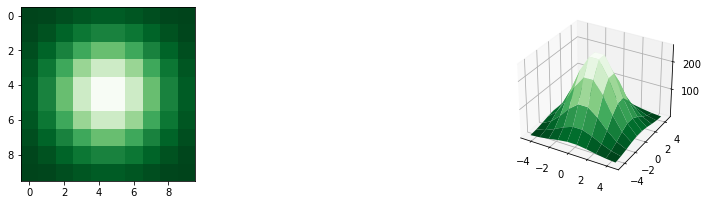

In [25]:
# Gaussian Kernel
size_spot = 10
spot_sigma = 2
space = np.linspace(-(size_spot - 1) / 2., (size_spot - 1) / 2., size_spot)
xx, yy = np.meshgrid(space, space)
kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(spot_sigma)) 
kernel = kernel / np.amax(kernel) * 255  # normalizing with respect to max and changing the range to [0,255]

# Plotting
fig = plt.figure(figsize=plt.figaspect(0.2))
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
ax.imshow(kernel,cmap='Greens_r') # Reds_r
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(xx, yy, kernel, cmap='Greens_r')
plt.show()

Example using [gaussian filter scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html). For a complete  list of filters in scipy use the following [link](https://docs.scipy.org/doc/scipy/reference/ndimage.html)

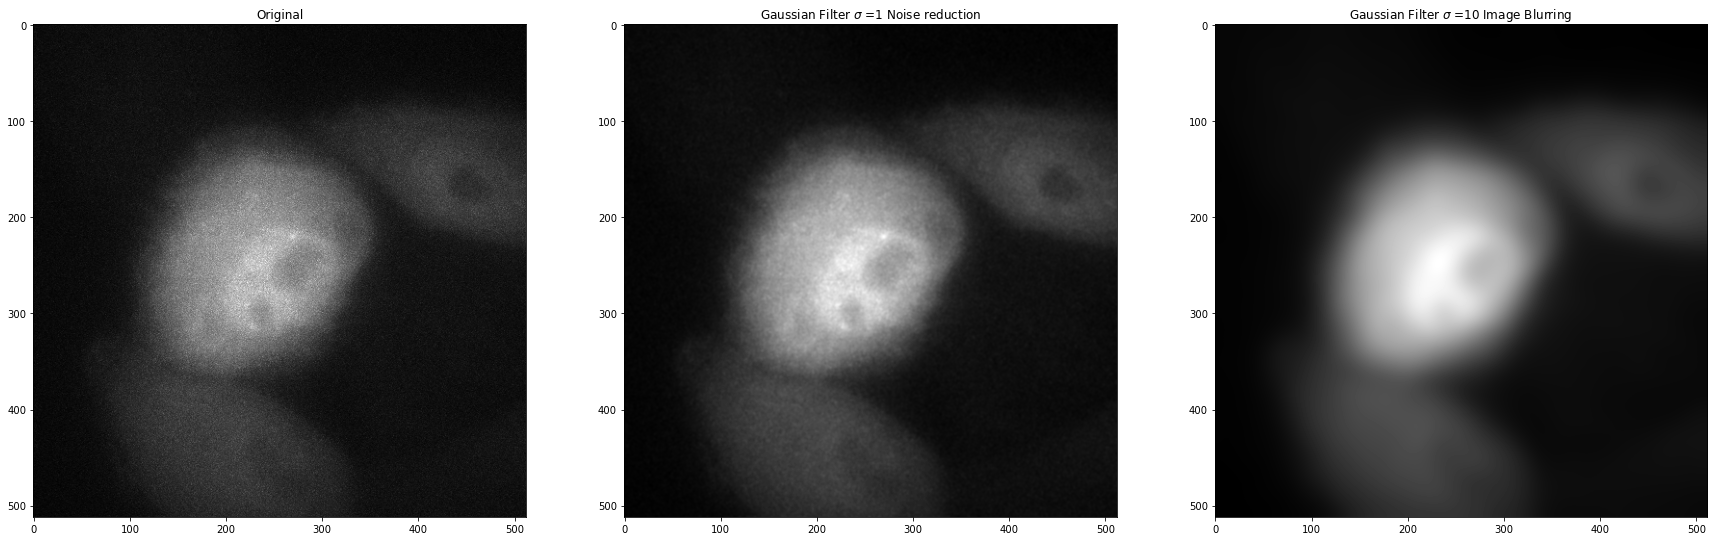

In [26]:
# Imoporting the library with the filter modules
from scipy.ndimage import gaussian_filter

img_copy = img.copy() # making a copy of our img
img_section = img_copy[0,:,:,0] # selecting a timepoint and color channel

# Applying the filter
img_gaussian_filter_simga_1 = gaussian_filter(img_section, sigma=1)
img_gaussian_filter_simga_10 = gaussian_filter(img_section, sigma=10)

# Side-by-side comparizon
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].imshow(img_section,cmap='gray')
ax[0].set(title='Original')

# noise reduction 
ax[1].imshow(img_gaussian_filter_simga_1,cmap='gray')
ax[1].set(title='Gaussian Filter $\sigma$ =1 Noise reduction')

# Blurring
ax[2].imshow(img_gaussian_filter_simga_10,cmap='gray')
ax[2].set(title='Gaussian Filter $\sigma$ =10 Image Blurring')
plt.show()

Filters in scikit-image. [Difference of gaussians](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.difference_of_gaussians).

This filter is used to locate elements between a low and a high value.

 For a complete list of filters in scikit-image use the following [link](https://scikit-image.org/docs/stable/api/skimage.filters.html).

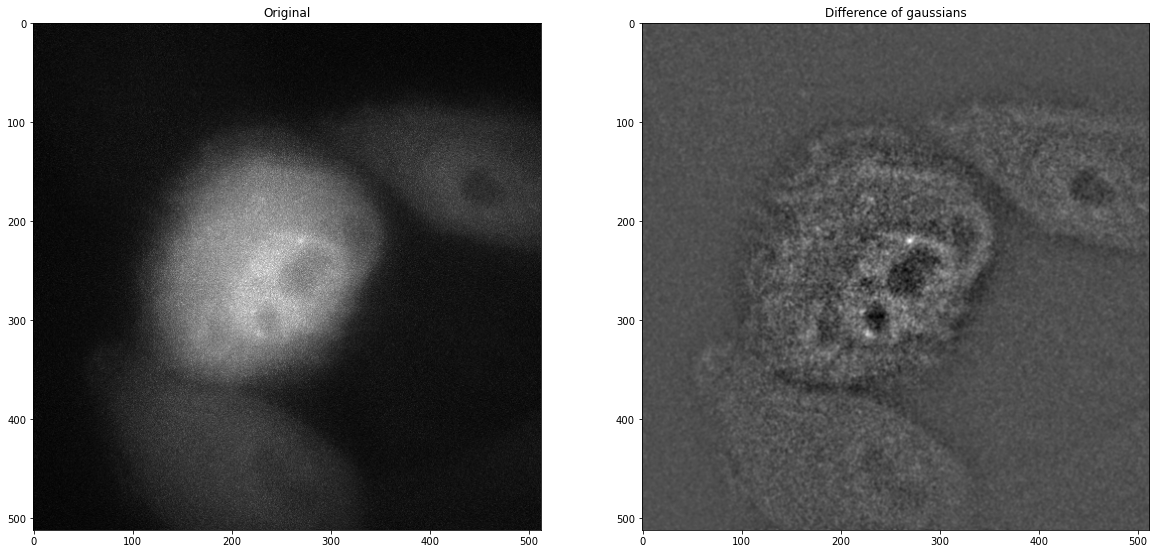

In [27]:
# Importing skiimage filters module
from skimage.filters import difference_of_gaussians

img_copy = img.copy() # making a copy of our img
img_section = img_copy[0,:,:,0] # selecting a timepoint and color channel

# Applying the filter to our image
img_diff_gaussians = difference_of_gaussians(img_section,low_sigma=1, high_sigma=10)
#img_diff_gaussians = difference_of_gaussians(img_section,low_sigma=5, high_sigma=10)

# Side-by-side comparizon
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(img_section,cmap='gray')
ax[0].set(title='Original')
ax[1].imshow(img_diff_gaussians,cmap='gray')
ax[1].set(title='Difference of gaussians')
plt.show()

#### Rotation

Simple rotation can be achieved by array manipulation.

Rotate an image 90$^\circ$ use transpose property of the array. [transpose](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html)

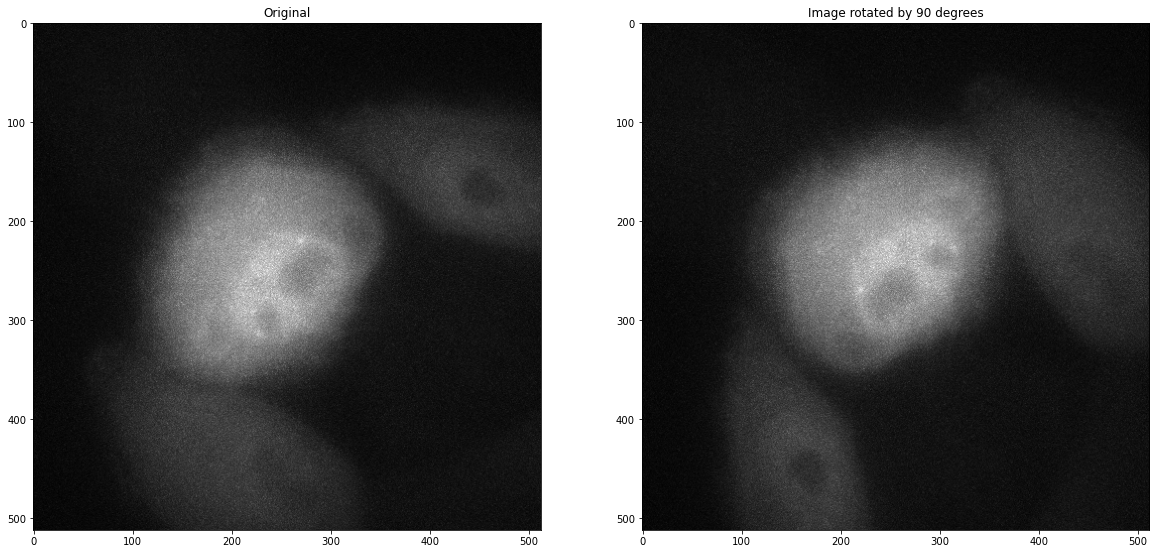

In [28]:
img_copy = img.copy() # making a copy of our img
img_section = img_copy[0,:,:,0] # selecting a timepoint and color channel

transposed_img = img_section.T # transposed property in a numpy array

# Side-by-side comparizon
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(img_section,cmap='gray')
ax[0].set(title='Original')
ax[1].imshow(transposed_img,cmap='gray')
ax[1].set(title= 'Image rotated by 90 degrees' )
plt.show()


Library [Rotate scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.rotate.html#scipy.ndimage.rotate)

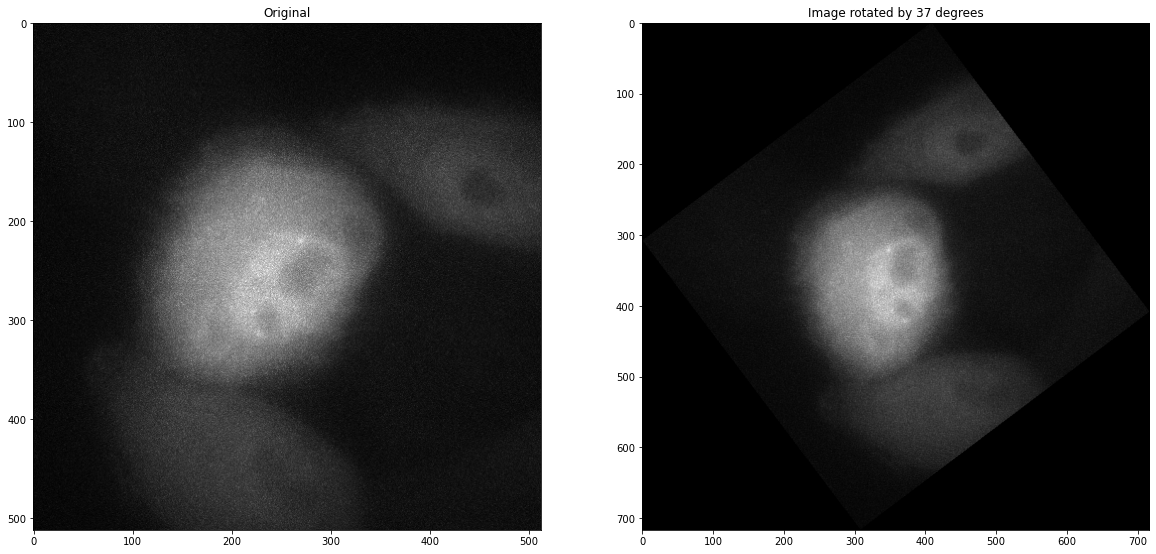

In [29]:
# Importing skiimage rotation module
from scipy import ndimage as nd

img_copy = img.copy() # making a copy of our img
img_section = img_copy[0,:,:,0] # selecting a timepoint and color channel

# rotate image to a given angle
selected_angle = 37
img_rotation = nd.rotate(img_section, angle=selected_angle)

# Side-by-side comparizon
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(img_section,cmap='gray')
ax[0].set(title='Original')
ax[1].imshow(img_rotation,cmap='gray')
ax[1].set(title= 'Image rotated by '+str(selected_angle)+ ' degrees' )
plt.show()


#### Image transformation. 

Consist of applying rotation, scaling, and translation processes to the image.

List of available [transformations in skimage](https://scikit-image.org/docs/stable/auto_examples/transform/plot_transform_types.html). Blog with more information about [applying transformations to images](https://towardsdatascience.com/image-processing-with-python-applying-homography-for-image-warping-84cd87d2108f)

Transformation matrix : 
 [[ 9.49421286e-01 -3.31545219e-02  1.00000000e+02]
 [ 3.31545219e-02  9.49421286e-01  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] 



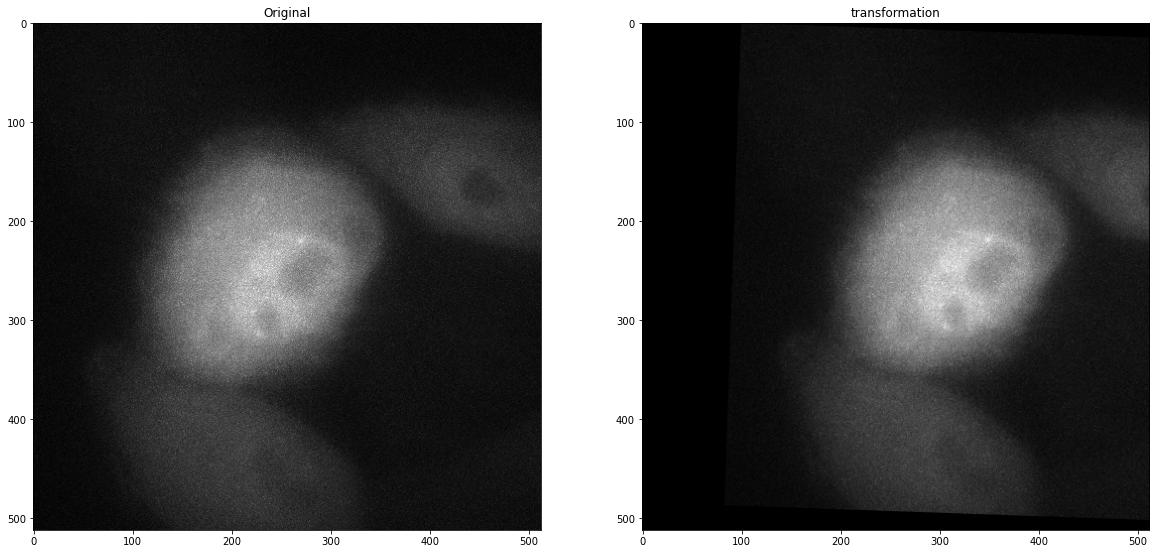

In [30]:
# Importing skiimage transformation module
from skimage import transform

img_copy = img.copy() # making a copy of our img
img_section = img_copy[0,:,:,0] # selecting a timepoint and color channel

#  transformation matrix
tform = transform.SimilarityTransform(
    scale = 0.95,                  # float, scaling value
    rotation = np.pi/90,           # Rotation angle in counter-clockwise direction as radians. pi/180 rad = 1 degrees
    translation=(100, 1))          # (x, y) values for translation .
print('Transformation matrix : \n', tform.params , '\n')

# Applying the transformation
tf_img = transform.warp(img_section, tform.inverse)

# Side-by-side comparizon
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(img_section,cmap='gray')
ax[0].set(title='Original')
ax[1].imshow(tf_img,cmap='gray')
ax[1].set_title('transformation')
plt.show()

## Working with a sequence of images

### Video

Visualizing a video with [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/)

In [31]:
import ipywidgets as widgets # Importing library
from ipywidgets import interact, interactive, HBox, Layout, VBox #  importing modules and functions.

In [33]:
## NOTE: This code may not work; you must have ffmpeg installed
# from matplotlib import animation
# # blit=True re-draws only the parts that have changed.
# fig,axes = plt.subplots(1,3,dpi=120,figsize=(8,3))
# i=0
# #Define inital frames
# Red = img[i,:,:,0]
# im1 = axes[0].imshow(Red,cmap='Reds_r')
# Green = img[i,:,:,1]
# im2 = axes[1].imshow(Green,cmap='Greens_r')
# Blue = img[i,:,:,2]
# im3 =  axes[2].imshow(Blue,cmap='Blues_r')
# axes[0].axis('off')
# axes[1].axis('off')
# axes[2].axis('off')

# def movieFrame(i):
#   Red = img[i,:,:,0]
#   Green = img[i,:,:,1]
#   Blue = img[i,:,:,2]
#   images = [Red,Green,Blue]
#   image_handles = [im1,im2,im3]
#   for k,image_n in enumerate(images):
#     image_handles[k].set_array(images[k])
#   return image_handles
  
# plt.close()
# anim = animation.FuncAnimation(fig, movieFrame, frames=img.shape[0], interval=20, blit=True)
# from IPython.display import HTML
# HTML(anim.to_html5_video())

In [34]:
def video_viewer( drop_channel, time):
    '''
    This function is intended to display an image from an array of images (specifically, video: img_int8). img_int8 is a numpy array with dimension [T,Y,X,C].
    drop_channel : str with options 'Ch_0', 'Ch_1', 'Ch_2', 'All'
    time: int with range 0 to the number of frames in video.
    '''
    plt.figure(1)
    if drop_channel == 'Ch_0':
      temp_image = img_int8[time,:,:,0]
      plt.imshow(temp_image,cmap='gray')
    elif drop_channel == 'Ch_1':
      temp_image = img_int8[time,:,:,1]
      plt.imshow(temp_image,cmap='gray')
    elif drop_channel == 'Ch_2':
      temp_image = img_int8[time,:,:,2]
      plt.imshow(temp_image,cmap='gray')
    else:
      temp_image = img_int8[time,:,:,:]    
      plt.imshow(temp_image)
    plt.show()

# Defining an interactive plot
interactive_plot = interactive(video_viewer,
                               drop_channel = widgets.Dropdown(options=['Ch_0', 'Ch_1', 'Ch_2', 'All'],description='Channel',value='Ch_1'),  # drop to select the channel
                               time = widgets.IntSlider(min=0,max=img_int8.shape[0]-1,step=1,value=0,description='Time'))       # time slider parameters
# Creates the controls
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
# Creates the outputs
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))

### Images with 3-dimensional space, Fluorescence in situ hybridization (FISH) images.

In [35]:
# Downloading the image to Colab
if not os.path.exists("./FISH_example.tif"):
   !wget -O FISH_example.tif "https://www.dropbox.com/s/669j6zags6xd7gr/FISH_example.tif?dl=1"

In [36]:
# importing the image as variable img
img_FISH = imread("./FISH_example.tif") 

In [37]:
# this image has dimension [Z,Y,X]
print(img_FISH.shape)

(21, 928, 624)


<img src= https://github.com/MunskyGroup/uqbio2021/raw/main/module_0/presentation/images/Slide7.png alt="drawing" width="1200"/>

In [38]:
# removing outliers
max_val = np.percentile(img_FISH, 99)
img_FISH [img_FISH> max_val] = max_val

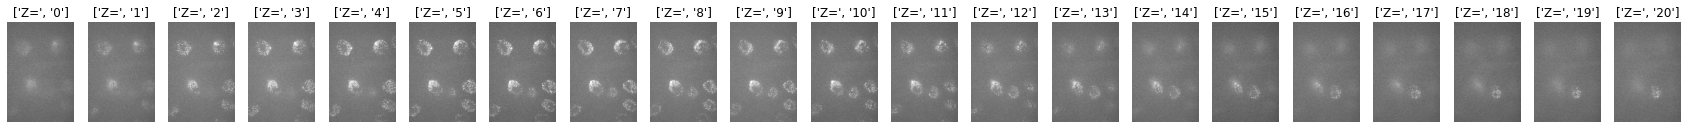

In [39]:
# Plotting the FISH image
fig, ax = plt.subplots(1,img_FISH.shape[0], figsize=(30, 10))
for i in range (0,img_FISH.shape[0]):
  ax[i].imshow(img_FISH[i,:,:],cmap='gray')
  ax[i].set(title= ['Z=',str(i)])
  ax[i].axis('off')
plt.show()

Moving in and out of focus

In [40]:
def FISH_viewer( z_value):
    '''
    This function is intended to display an image from an array of images (specifically, video: img_int8). img_int8 is a numpy array with dimension [T,Y,X,C].
    drop_channel : str with options 'Ch_0', 'Ch_1', 'Ch_2', 'All'
    time: int with range 0 to the number of frames in video.
    '''
    plt.figure(1)
    temp_FISH_image = img_FISH[z_value,:,:]    
    plt.imshow(temp_FISH_image,cmap='gray')
    plt.show()

# Defining an interactive plot
interactive_plot = interactive(FISH_viewer,
                               z_value = widgets.IntSlider(min=0,max=img_FISH.shape[0]-1,step=1,value=0,description='z-value'))       # time slider parameters
# Creates the controls
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
# Creates the outputs
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))

## Operations on multiple images

<img src= https://github.com/MunskyGroup/uqbio2021/raw/main/module_0/presentation/images/Slide7.png alt="drawing" width="1200"/>

Maximum projections

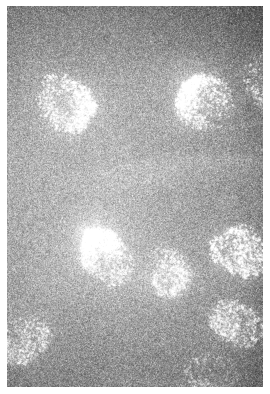

Dimensions on the original sequence of images : (21, 928, 624) 

Dimensions on the maximum projection : (928, 624)


In [41]:
# Making a copy of our sequence of images
img_FISH_copy = img_FISH.copy() # making a copy of our img

# applying a maximum projection
img_max_z_projection = np.max(img_FISH, axis=0)

# Plotting
plt.figure(figsize=(7,7))
plt.imshow(img_max_z_projection,cmap='gray')
plt.axis('off')
plt.show()

# Printing results
print('Dimensions on the original sequence of images :', img_FISH.shape, '\n')
print('Dimensions on the maximum projection :', img_max_z_projection.shape)

Normalizing intensity for every channel and time point.

In [42]:
img_normalized = np.zeros_like(img)   # prealocating memory
number_timepoints, y_dim, x_dim, number_channels = img.shape[0], img.shape[1], img.shape[2], img.shape[3] # obtaining the dimensions size

# Normalization using a nested for-loop
for index_channels in range (number_channels): # iteration for every channel
    for index_time in range (number_timepoints): # iterating for every time point
        max_val = np.amax(img[index_time,:,:,index_channels])
        min_val = np.amin(img[index_time,:,:,index_channels])
        img_normalized[index_time,:,:,index_channels] = (img[index_time,:,:,index_channels]-min_val) / (max_val-min_val) # normalization 

# Printing the output
print('Range values in the original sequence of images: (' , np.amin(img) ,',', np.amax(img) ,')\n' )
print('Range values in the normalized sequence of images: (' , np.amin(img_normalized) ,',', np.amax(img_normalized) ,')\n' )

Range values in the original sequence of images: ( 0 , 6380 )

Range values in the normalized sequence of images: ( 0 , 1 )



Transposing dimensions

In [43]:
# Making a copy of our sequence of images
img_int8_copy = img_int8.copy() # making a copy of our img  [T, Y, X, C]

# reshaping the video. Changing the Time position (0) to the last place (3).     [C, Y, X, T]
img_transposed = np.transpose(img_int8_copy, (3, 1, 2, 0))

# Printing results
print('Dimensions on the original sequence of images :', img_int8_copy.shape, '\n')
print('Dimensions on the maximum projection :', img_transposed.shape)

Dimensions on the original sequence of images : (35, 512, 512, 3) 

Dimensions on the maximum projection : (3, 512, 512, 35)


In [44]:
print(img_int8_copy.shape)

(35, 512, 512, 3)


# Questions

Questions to consider
* Make an image showing just the red channel at the 23 time point of the tensor video
* Make a smaller image that is compressed to 1/2 resolution in X, and 1/3 resolution in Y.
* Make a color image (3 channels) where you magnify the blue channel by a value
* Create a new video image tensor, which is centered around the brightest pixel of the image and is a 50x50 cutout of the original video/tensor. Do this before and after applying a gaussian filter
* Make an image that is mirror flipped vertically, and one that is flipped horizontally


# References


> Image downloaded from https://figshare.com from publication: "Forero-Quintero, L.S., Raymond, W., Handa, T. et al. Live-cell imaging reveals the spatiotemporal organization of endogenous RNA polymerase II phosphorylation at a single gene. Nat Commun 12, 3158 (2021). https://doi.org/10.1038/s41467-021-23417-0"
>
